In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('cars.csv')
df.head()

,Unnamed: 0,Name,EMI,Price,Kilometers Driven,Owner,Year of Purchase,Fuel Type,Location,History
0,0,2011 Maruti Alto K10,"₹4,734/month","₹2,12,799","20,354 km",1st Owner,April 2011,Petrol,DELHI,Non-Accidental
1,1,2020 Maruti Swift,"₹12,110/month","₹5,44,399","6,623 km",1st Owner,January 2020,Petrol,DELHI,Non-Accidental
2,2,2021 Maruti Swift,"₹17,017/month","₹7,65,000",-,-,-,-,-,-
3,3,2017 Maruti Alto 800,"₹6,535/month","₹2,93,799","8,501 km",1st Owner,June 2017,Petrol,DELHI,Non-Accidental
4,4,2012 Maruti Alto K10,"₹3,908/month","₹1,75,699","42,321 km",1st Owner,January 2012,Petrol,DELHI,Non-Accidental


In [3]:
#checking the shape of the train dataset
df.shape

(2572, 10)

In [4]:
# checking the information of the train dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2572 entries, 0 to 2571
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         2572 non-null   int64 
 1   Name               2572 non-null   object
 2   EMI                2572 non-null   object
 3   Price              2572 non-null   object
 4   Kilometers Driven  2572 non-null   object
 5   Owner              2572 non-null   object
 6   Year of Purchase   2572 non-null   object
 7   Fuel Type          2572 non-null   object
 8   Location           2572 non-null   object
 9   History            2572 non-null   object
dtypes: int64(1), object(9)
memory usage: 201.1+ KB


In [5]:
#checking the columns of train dataset
df.columns

Index(['Unnamed: 0', 'Name', 'EMI', 'Price', 'Kilometers Driven', 'Owner',
       'Year of Purchase', 'Fuel Type', 'Location', 'History'],
      dtype='object')

In [6]:
# checking the data types of dataset
df.dtypes

Unnamed: 0            int64
Name                 object
EMI                  object
Price                object
Kilometers Driven    object
Owner                object
Year of Purchase     object
Fuel Type            object
Location             object
History              object
dtype: object

In [7]:
# As the Unnamed:0 column has no relevance. So, we are deleting this.
df.drop('Unnamed: 0',axis=1,inplace=True)

# Finding Missing Values

In [8]:
df['Name'].value_counts()

-                                          1347
2021 HYUNDAI NEW I20                         34
2015 Maruti Swift                            33
2013 Maruti Swift                            26
2014 Maruti Swift                            23
                                           ... 
2015 Toyota Fortuner                          1
2014 Tata Zest XE QUADRAJET 75PS MANUAL       1
2016 Ford Figo Aspire                         1
2012 Maruti Ertiga                            1
2018 Honda Jazz                               1
Name: Name, Length: 413, dtype: int64

In [9]:
df['Name'].replace('-',np.nan,inplace=True)

In [10]:
df['Name'].isnull().sum()

1347

In [11]:
df['EMI'].replace('-',np.nan,inplace=True)

In [12]:
df['EMI'].isnull().sum()

1347

In [13]:
df['Kilometers Driven'].replace('-',np.nan,inplace=True)

In [14]:
df['Kilometers Driven'].isnull().sum()

593

In [15]:
df.dtypes

Name                 object
EMI                  object
Price                object
Kilometers Driven    object
Owner                object
Year of Purchase     object
Fuel Type            object
Location             object
History              object
dtype: object

In [16]:
df['Price'].replace('-',np.nan,inplace=True)

In [17]:
df['Price'].isnull().sum()

1347

In [18]:
df.dtypes

Name                 object
EMI                  object
Price                object
Kilometers Driven    object
Owner                object
Year of Purchase     object
Fuel Type            object
Location             object
History              object
dtype: object

In [19]:
df['Owner'].replace('-',np.nan,inplace=True)

In [20]:
df['Owner'].isnull().sum()

653

In [21]:
df['Year of Purchase'].replace('-',np.nan,inplace=True)

In [22]:
df['Year of Purchase'].isnull().sum()

1235

In [23]:
df['Fuel Type'].replace('-',np.nan,inplace=True)

In [24]:
df['Fuel Type'].isnull().sum()

653

In [25]:
df['Location'].replace('-',np.nan,inplace=True)

In [26]:
df['Location'].isnull().sum()

653

In [27]:
df['History'].replace('-',np.nan,inplace=True)

In [28]:
df['History'].isnull().sum()

653

In [29]:
df.head()

,Name,EMI,Price,Kilometers Driven,Owner,Year of Purchase,Fuel Type,Location,History
0,2011 Maruti Alto K10,"₹4,734/month","₹2,12,799","20,354 km",1st Owner,April 2011,Petrol,DELHI,Non-Accidental
1,2020 Maruti Swift,"₹12,110/month","₹5,44,399","6,623 km",1st Owner,January 2020,Petrol,DELHI,Non-Accidental
2,2021 Maruti Swift,"₹17,017/month","₹7,65,000",NaN,NaN,NaN,NaN,NaN,NaN
3,2017 Maruti Alto 800,"₹6,535/month","₹2,93,799","8,501 km",1st Owner,June 2017,Petrol,DELHI,Non-Accidental
4,2012 Maruti Alto K10,"₹3,908/month","₹1,75,699","42,321 km",1st Owner,January 2012,Petrol,DELHI,Non-Accidental


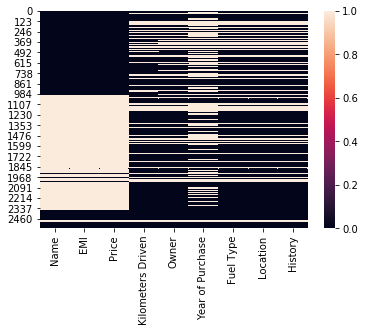

In [30]:
sns.heatmap(df.isnull())

In [31]:
#checking the null values
df.isnull().sum()

Name                 1347
EMI                  1347
Price                1347
Kilometers Driven     593
Owner                 653
Year of Purchase     1235
Fuel Type             653
Location              653
History               653
dtype: int64

# Treating Missing Values

In [33]:
df['Name']=df['Name'].fillna(df['Name'].mode()[0])

In [34]:
df['History']=df['History'].fillna(df['History'].mode()[0])

In [35]:
df['Location']=df['Location'].fillna(df['Location'].mode()[0])

In [36]:
df['Fuel Type']=df['Fuel Type'].fillna(df['Fuel Type'].mode()[0])

In [37]:
df['Year of Purchase']=df['Year of Purchase'].fillna(df['Year of Purchase'].mode()[0])

In [38]:
df['Owner']=df['Owner'].fillna(df['Owner'].mode()[0])

In [39]:
df['Kilometers Driven']=df['Kilometers Driven'].fillna(df['Kilometers Driven'].mode()[0])

In [40]:
df['EMI']=df['EMI'].fillna(df['EMI'].mode()[0])

In [41]:
df.dtypes

Name                 object
EMI                  object
Price                object
Kilometers Driven    object
Owner                object
Year of Purchase     object
Fuel Type            object
Location             object
History              object
dtype: object

In [42]:
df['Price']=df['Price'].fillna(df['Price'].mode()[0])

In [43]:
df.dtypes

Name                 object
EMI                  object
Price                object
Kilometers Driven    object
Owner                object
Year of Purchase     object
Fuel Type            object
Location             object
History              object
dtype: object

In [44]:
df.isnull().sum()

Name                 0
EMI                  0
Price                0
Kilometers Driven    0
Owner                0
Year of Purchase     0
Fuel Type            0
Location             0
History              0
dtype: int64

# Data Cleaning

In [45]:
df['Price'] =df['Price'].str.split('₹').str[1]

In [46]:
df['Price']

0       2,12,799
1       5,44,399
2       7,65,000
3       2,93,799
4       1,75,699
          ...   
2567    2,94,299
2568    2,62,699
2569    4,92,199
2570    4,44,799
2571    6,52,399
Name: Price, Length: 2572, dtype: object

In [47]:
df['Price'].unique()

array(['2,12,799', '5,44,399', '7,65,000', '2,93,799', '1,75,699',
       '3,96,599', '3,93,099', '2,77,699', '2,46,399', '3,45,699',
       '2,78,799', '6,00,799', '2,93,599', '4,62,899', '5,97,899',
       '3,18,299', '4,06,799', '6,62,799', '3,51,799', '3,11,099',
       '4,24,299', '2,01,699', '6,64,799', '3,03,000', '1,90,499',
       '5,24,799', '3,25,199', '3,75,399', '2,62,399', '3,48,599',
       '3,78,699', '3,14,399', '4,62,199', '2,79,099', '3,35,399',
       '3,65,399', '2,34,399', '6,40,799', '5,86,000', '2,92,499',
       '2,97,899', '1,42,000', '4,23,799', '3,11,999', '2,98,000',
       '2,01,399', '3,86,899', '6,56,000', '2,55,299', '2,48,099',
       '3,89,499', '2,23,299', '4,02,699', '2,22,399', '3,28,799',
       '3,59,499', '4,14,699', '1,79,000', '5,53,699', '2,22,799',
       '4,40,000', '2,79,000', '3,03,799', '1,79,199', '2,63,599',
       '5,02,399', '4,14,000', '1,77,699', '3,68,999', '4,77,499',
       '4,82,000', '11,80,000', '4,56,799', '11,56,799', '2,00

In [49]:
df['Price'] = df['Price'].str.replace(',','')


In [50]:
df['Price']

0       212799
1       544399
2       765000
3       293799
4       175699
         ...  
2567    294299
2568    262699
2569    492199
2570    444799
2571    652399
Name: Price, Length: 2572, dtype: object

In [51]:
df['Price']=df['Price'].astype('int32')

In [52]:
df.dtypes

Name                 object
EMI                  object
Price                 int32
Kilometers Driven    object
Owner                object
Year of Purchase     object
Fuel Type            object
Location             object
History              object
dtype: object

In [53]:
df['History'].value_counts()

Non-Accidental    2572
Name: History, dtype: int64

In [54]:
df['Location'].value_counts()

DELHI       1943
GURGAON      359
NOIDA        269
LUDHIANA       1
Name: Location, dtype: int64

In [55]:
df['Fuel Type'].value_counts()

Petrol          1760
Diesel           746
Petrol + CNG      66
Name: Fuel Type, dtype: int64

In [56]:
df['Owner'].value_counts()

1st Owner    2184
2nd Owner     341
3rd Owner      42
4th Owner       5
Name: Owner, dtype: int64

In [57]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [58]:
df['Year of Purchase'].value_counts()

Valid upto Oct 2022\n3rd Party      1320
January 2014                          29
January 2019                          28
January 2013                          27
January 2016                          27
                                    ... 
September 2011                         1
April 2021                             1
September 2008                         1
Valid upto Apr 2022\nThird_party       1
January 2009                           1
Name: Year of Purchase, Length: 164, dtype: int64

In [59]:
df['Year of Purchase'].unique()

array(['April 2011', 'January 2020', 'Valid upto Oct 2022\n3rd Party',
       'June 2017', 'January 2012', 'May 2013', 'February 2014',
       'September 2017', 'March 2014', 'June 2018', 'January 2019',
       'February 2011', 'April 2016', 'November 2016', 'November 2013',
       'January 2013', 'September 2016', 'February 2016', 'July 2017',
       'February 2017', 'October 2020', 'April 2014', 'March 2010',
       'March 2013', 'April 2018', 'October 2010', 'January 2014',
       'February 2020', 'October 2013', 'September 2020',
       'September 2013', 'February 2013', 'September 2010', 'March 2017',
       'May 2017', 'December 2012', 'August 2014', 'June 2010',
       'July 2014', 'April 2019', 'December 2014', 'April 2015',
       'June 2013', 'February 2018', 'November 2020', 'March 2016',
       'November 2012', 'October 2012', 'October 2017', 'August 2017',
       'October 2014', 'May 2010', 'January 2018', 'November 2018',
       'June 2016', 'September 2019', 'September 2

In [60]:
df['Year of Purchase']=df['Year of Purchase'].str.replace('Valid upto May 2022\nComp' ,'2022')
df['Year of Purchase']=df['Year of Purchase'].str.replace('Valid upto Jan 2022\nComp' ,'2022')
df['Year of Purchase']=df['Year of Purchase'].str.replace('Valid upto May 2022\nThird_party' ,'2022')
df['Year of Purchase']=df['Year of Purchase'].str.replace('Valid upto Jan 2022\nZero_Dep' ,'2022')
df['Year of Purchase']=df['Year of Purchase'].str.replace('Valid upto May 2022\nZero_Dep' ,'2022')
df['Year of Purchase']=df['Year of Purchase'].str.replace('Valid upto Mar 2022\nZero_Dep' ,'2022')
df['Year of Purchase']=df['Year of Purchase'].str.replace('Valid upto Apr 2022\nThird_party' ,'2022')
df['Year of Purchase']=df['Year of Purchase'].str.replace('Valid upto Jan 2022\nThird Party' ,'2022')
df['Year of Purchase']=df['Year of Purchase'].str.replace('Valid upto Feb 2022\nZero_Dep' ,'2022')
df['Year of Purchase']=df['Year of Purchase'].str.replace('Valid upto Mar 2022\nThird Party' ,'2022')
df['Year of Purchase']=df['Year of Purchase'].str.replace('Valid upto Feb 2022\nComp' ,'2022')
df['Year of Purchase']=df['Year of Purchase'].str.replace('Valid upto Feb 2022\nThird Party' ,'2022')
df['Year of Purchase']=df['Year of Purchase'].str.replace('Valid upto Mar 2022\nComp' ,'2022')
df['Year of Purchase']=df['Year of Purchase'].str.replace('Valid upto Oct 2022\n3rd Party' ,'2022')


In [61]:
df['Year of Purchase'].unique()

array(['April 2011', 'January 2020', '2022', 'June 2017', 'January 2012',
       'May 2013', 'February 2014', 'September 2017', 'March 2014',
       'June 2018', 'January 2019', 'February 2011', 'April 2016',
       'November 2016', 'November 2013', 'January 2013', 'September 2016',
       'February 2016', 'July 2017', 'February 2017', 'October 2020',
       'April 2014', 'March 2010', 'March 2013', 'April 2018',
       'October 2010', 'January 2014', 'February 2020', 'October 2013',
       'September 2020', 'September 2013', 'February 2013',
       'September 2010', 'March 2017', 'May 2017', 'December 2012',
       'August 2014', 'June 2010', 'July 2014', 'April 2019',
       'December 2014', 'April 2015', 'June 2013', 'February 2018',
       'November 2020', 'March 2016', 'November 2012', 'October 2012',
       'October 2017', 'August 2017', 'October 2014', 'May 2010',
       'January 2018', 'November 2018', 'June 2016', 'September 2019',
       'September 2014', 'April 2009', 'Janua

In [62]:
df['Year of Purchase'].unique()

array(['April 2011', 'January 2020', '2022', 'June 2017', 'January 2012',
       'May 2013', 'February 2014', 'September 2017', 'March 2014',
       'June 2018', 'January 2019', 'February 2011', 'April 2016',
       'November 2016', 'November 2013', 'January 2013', 'September 2016',
       'February 2016', 'July 2017', 'February 2017', 'October 2020',
       'April 2014', 'March 2010', 'March 2013', 'April 2018',
       'October 2010', 'January 2014', 'February 2020', 'October 2013',
       'September 2020', 'September 2013', 'February 2013',
       'September 2010', 'March 2017', 'May 2017', 'December 2012',
       'August 2014', 'June 2010', 'July 2014', 'April 2019',
       'December 2014', 'April 2015', 'June 2013', 'February 2018',
       'November 2020', 'March 2016', 'November 2012', 'October 2012',
       'October 2017', 'August 2017', 'October 2014', 'May 2010',
       'January 2018', 'November 2018', 'June 2016', 'September 2019',
       'September 2014', 'April 2009', 'Janua

In [63]:
df['Year of Purchase'] = df['Year of Purchase'].str.split(' ').str[-1]


In [64]:
df['Year of Purchase']

0       2011
1       2020
2       2022
3       2017
4       2012
        ... 
2567    2017
2568    2022
2569    2022
2570    2014
2571    2022
Name: Year of Purchase, Length: 2572, dtype: object

In [65]:
df['Kilometers Driven'] = df['Kilometers Driven'].str.replace(',','')

In [66]:
df['Kilometers Driven'] = df['Kilometers Driven'].str.slice(stop=-2).astype(int)

In [67]:
df['Kilometers Driven']

0       20354
1        6623
2       12268
3        8501
4       42321
        ...  
2567     5636
2568    15468
2569    12268
2570    13509
2571     6460
Name: Kilometers Driven, Length: 2572, dtype: int32

In [68]:
df['EMI'].value_counts()

₹15,794/month    1381
₹7,229/month        6
₹10,010/month       5
₹9,788/month        5
₹7,452/month        4
                 ... 
₹8,351/month        1
₹11,451/month       1
₹8,157/month        1
₹5,432/month        1
₹6,211/month        1
Name: EMI, Length: 973, dtype: int64

In [69]:
df['EMI'].unique()

array(['₹4,734/month', '₹12,110/month', '₹17,017/month', '₹6,535/month',
       '₹3,908/month', '₹8,822/month', '₹8,744/month', '₹6,177/month',
       '₹5,481/month', '₹7,690/month', '₹6,202/month', '₹13,364/month',
       '₹6,531/month', '₹10,297/month', '₹13,300/month', '₹7,080/month',
       '₹9,049/month', '₹14,744/month', '₹7,826/month', '₹6,920/month',
       '₹9,438/month', '₹4,487/month', '₹14,788/month', '₹6,740/month',
       '₹4,238/month', '₹11,674/month', '₹7,234/month', '₹8,351/month',
       '₹5,837/month', '₹7,754/month', '₹8,424/month', '₹6,994/month',
       '₹10,281/month', '₹6,208/month', '₹7,461/month', '₹8,128/month',
       '₹5,214/month', '₹14,254/month', '₹13,035/month', '₹6,506/month',
       '₹6,627/month', '₹3,159/month', '₹9,427/month', '₹6,940/month',
       '₹6,629/month', '₹4,480/month', '₹8,606/month', '₹14,592/month',
       '₹5,679/month', '₹5,519/month', '₹8,664/month', '₹4,967/month',
       '₹8,958/month', '₹4,947/month', '₹7,314/month', '₹7,997/mo

In [70]:
df['EMI'] =df['EMI'].str.split('₹').str[1]

In [71]:
df['EMI'] = df['EMI'].str.replace('/month','')

In [72]:
df['EMI']

0        4,734
1       12,110
2       17,017
3        6,535
4        3,908
         ...  
2567     6,306
2568     5,905
2569    10,652
2570     9,505
2571    14,847
Name: EMI, Length: 2572, dtype: object

In [73]:
df['EMI'] = df['EMI'].str.replace(',','')

In [74]:
df['EMI']

0        4734
1       12110
2       17017
3        6535
4        3908
        ...  
2567     6306
2568     5905
2569    10652
2570     9505
2571    14847
Name: EMI, Length: 2572, dtype: object

In [75]:
df['Name'].unique()

array(['2011 Maruti Alto K10', '2020 Maruti Swift', '2021 Maruti Swift',
       '2017 Maruti Alto 800', '2012 Maruti Alto K10',
       '2013 Maruti Swift', '2014 Maruti Swift', '2015 Hyundai Eon',
       '2017 Datsun Redi Go', '2017 Maruti Alto K10',
       '2015 Maruti Alto 800', '2020 Hyundai AURA',
       '2014 Maruti Alto 800', '2018 Hyundai Grand i10',
       '2019 Maruti Baleno', '2011 Toyota Etios', '2016 Maruti Swift',
       '2020 Maruti Baleno', '2020 Maruti Alto', '2017 Renault Kwid',
       '2018 Maruti Wagon R 1.0', '2015 Honda City',
       '2016 Maruti Alto K10', '2013 Maruti Alto 800', '2016 Honda Jazz',
       '2018 Maruti Alto 800', '2014 Hyundai Grand i10',
       '2013 Maruti Alto K10', '2018 Maruti Swift',
       '2013 Maruti Swift Dzire', '2016 Maruti Ertiga',
       '2017 Maruti Baleno', '2011 Maruti Alto', '2015 Maruti Ritz',
       '2011 Maruti Ritz', '2019 Maruti Alto K10', '2016 Maruti Baleno',
       '2010 Maruti SX4', '2017 Maruti Wagon R 1.0', '2015 Maruti

In [76]:
df['Brand'] = df['Name'].str.split(' ').str[1]

In [77]:
df['Brand']

0        Maruti
1        Maruti
2        Maruti
3        Maruti
4        Maruti
         ...   
2567     Maruti
2568     Datsun
2569     Maruti
2570     Maruti
2571    Renault
Name: Brand, Length: 2572, dtype: object

In [78]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Toyota', 'Renault', 'Honda', 'KIA',
       'Tata', 'Ford', 'Mahindra', 'Chevrolet', 'Volkswagen', 'Skoda',
       'Nissan', 'MG', 'BMW', 'Mercedes', 'Jeep', 'Audi', 'Fiat',
       'Ssangyong', 'HYUNDAI'], dtype=object)

In [79]:
df.head()

,Name,EMI,Price,Kilometers Driven,Owner,Year of Purchase,Fuel Type,Location,History,Brand
0,2011 Maruti Alto K10,4734,212799,20354,1st Owner,2011,Petrol,DELHI,Non-Accidental,Maruti
1,2020 Maruti Swift,12110,544399,6623,1st Owner,2020,Petrol,DELHI,Non-Accidental,Maruti
2,2021 Maruti Swift,17017,765000,12268,1st Owner,2022,Petrol,DELHI,Non-Accidental,Maruti
3,2017 Maruti Alto 800,6535,293799,8501,1st Owner,2017,Petrol,DELHI,Non-Accidental,Maruti
4,2012 Maruti Alto K10,3908,175699,42321,1st Owner,2012,Petrol,DELHI,Non-Accidental,Maruti


In [80]:
df['History'].value_counts()

Non-Accidental    2572
Name: History, dtype: int64

In [81]:
df.drop(['Name','History'],axis=1,inplace=True)

In [82]:
df.shape

(2572, 8)

In [83]:
df['Year of Purchase'].value_counts()

2022    1352
2013     166
2017     163
2015     147
2014     142
2016     142
2018     107
2012      96
2019      84
2020      47
2011      45
2010      38
2009      23
2008      14
2007       4
2021       2
Name: Year of Purchase, dtype: int64

In [84]:
df.head()

,EMI,Price,Kilometers Driven,Owner,Year of Purchase,Fuel Type,Location,Brand
0,4734,212799,20354,1st Owner,2011,Petrol,DELHI,Maruti
1,12110,544399,6623,1st Owner,2020,Petrol,DELHI,Maruti
2,17017,765000,12268,1st Owner,2022,Petrol,DELHI,Maruti
3,6535,293799,8501,1st Owner,2017,Petrol,DELHI,Maruti
4,3908,175699,42321,1st Owner,2012,Petrol,DELHI,Maruti


# Statistical Summary 

In [85]:
#checking the description/summary of the datset
df.describe()

,Price,Kilometers Driven
count,2.572000e+03,2572.000000
mean,6.035230e+05,47485.762442
std,2.370489e+05,41807.946508
min,1.000000e+05,23.000000
25%,4.246740e+05,12268.000000
50%,7.100000e+05,36012.500000
75%,7.100000e+05,70394.750000
max,4.040000e+06,578889.000000


# Univariate Analysis

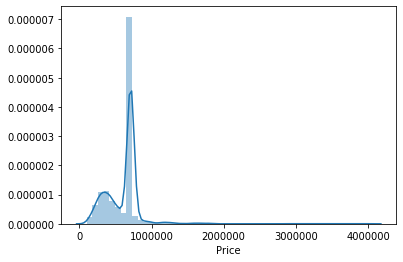

In [86]:
sns.distplot(df['Price'])

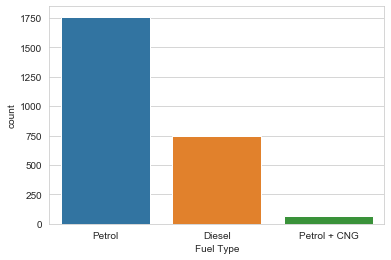

In [87]:
sns.set_style('whitegrid')
sns.countplot(df['Fuel Type'])

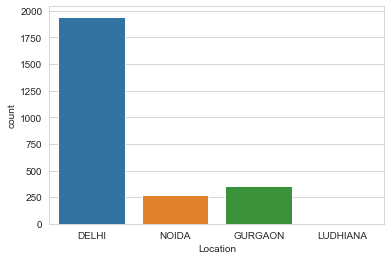

In [88]:
sns.set_style('whitegrid')
sns.countplot(df['Location'])

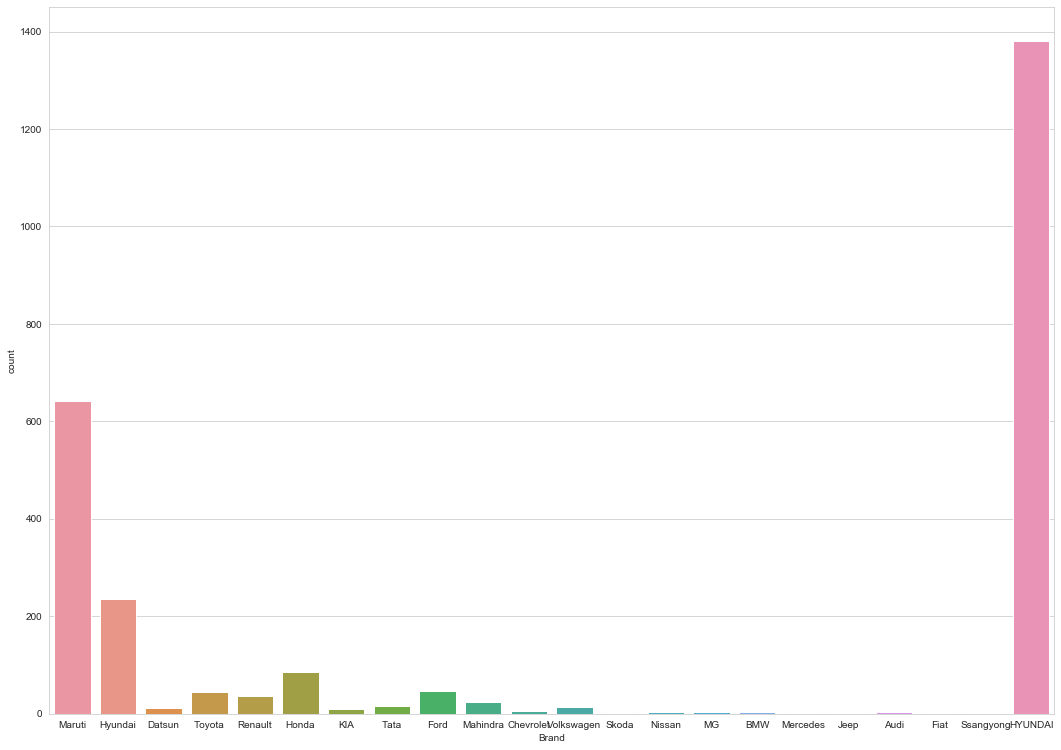

In [89]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,13))
sns.countplot(df['Brand'])

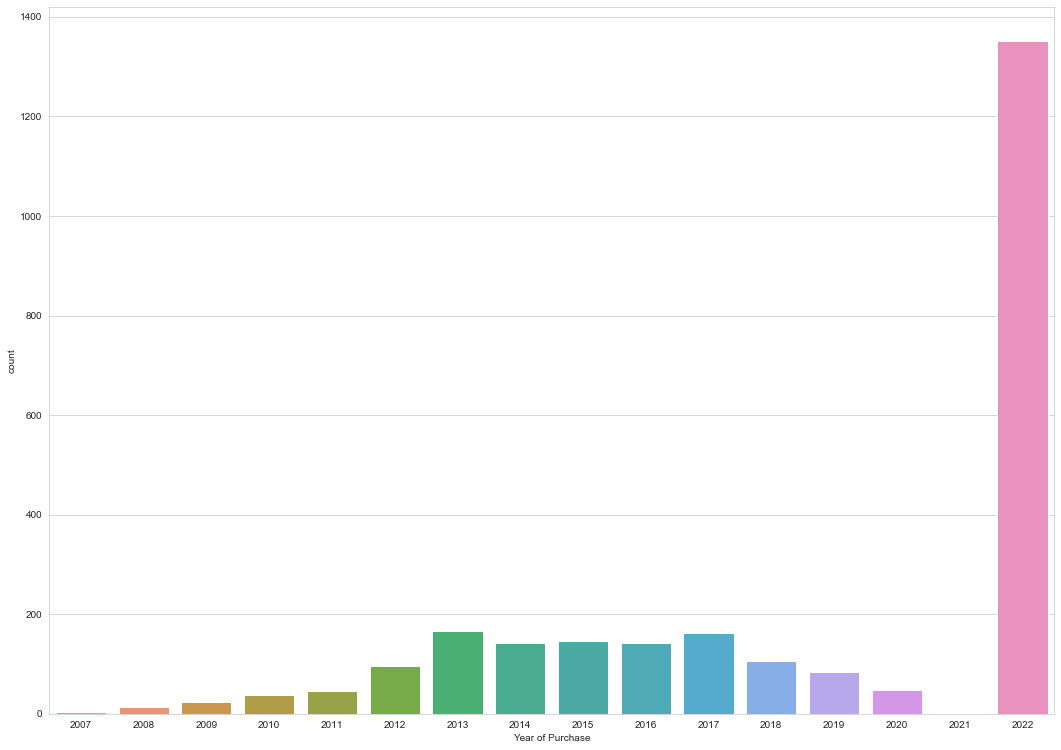

In [91]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,13))
sns.countplot(df['Year of Purchase'])

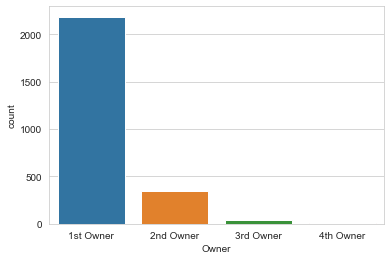

In [92]:
sns.set_style('whitegrid')
sns.countplot(df['Owner'])

# Bivariate Analysis

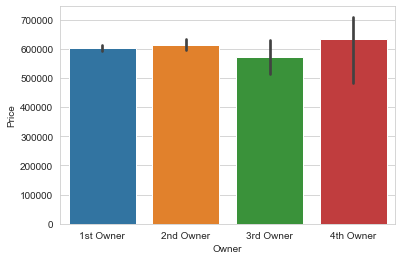

In [93]:
sns.set_style('whitegrid')
sns.barplot(x='Owner',y='Price',data=df)

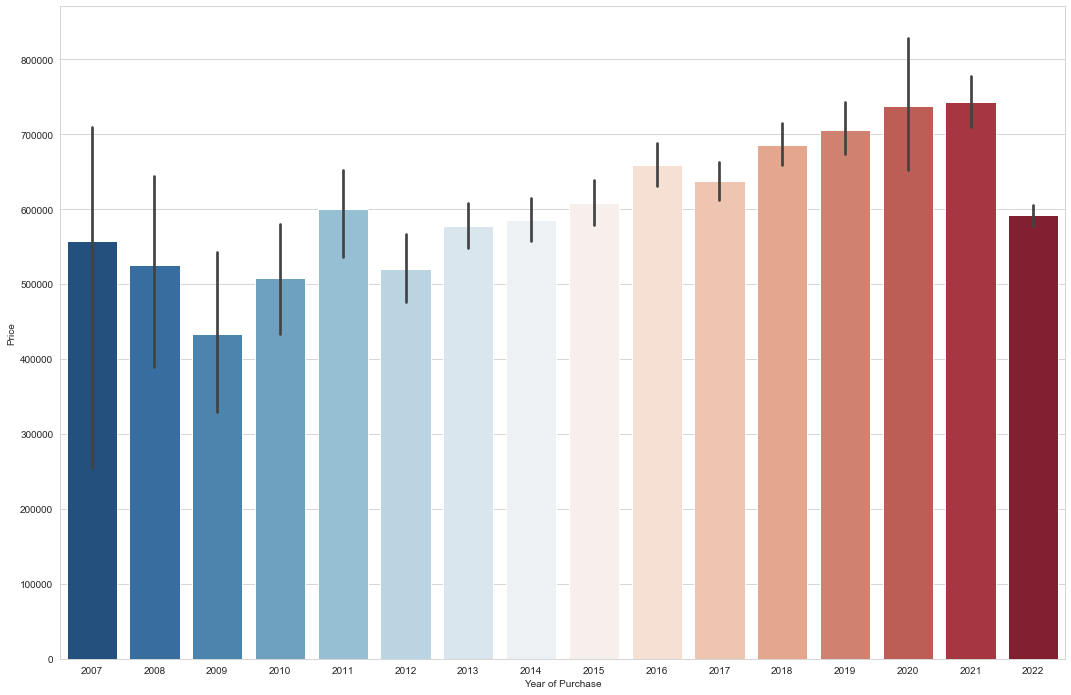

In [94]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,12))
sns.barplot(x='Year of Purchase',y='Price',data=df,palette='RdBu_r')

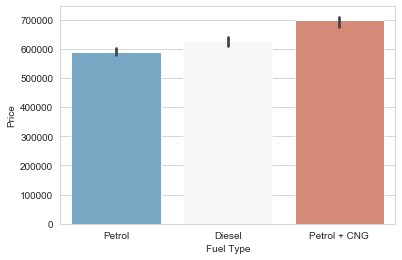

In [95]:
sns.set_style('whitegrid')
sns.barplot(x='Fuel Type',y='Price',data=df,palette='RdBu_r')

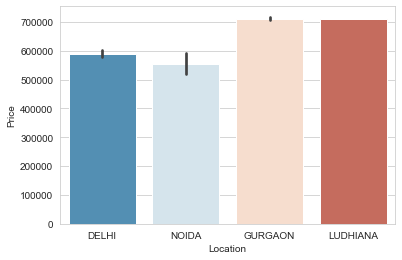

In [96]:

sns.set_style('whitegrid')
sns.barplot(x='Location',y='Price',data=df,palette='RdBu_r')

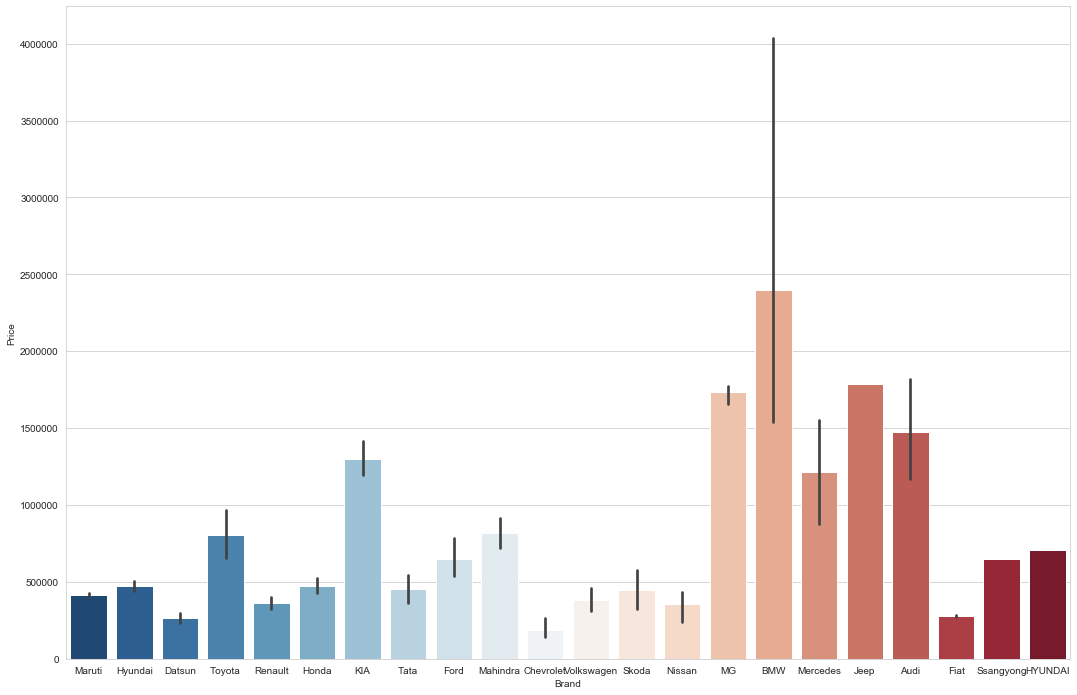

In [97]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.barplot(x='Brand',y='Price',data=df,palette='RdBu_r')

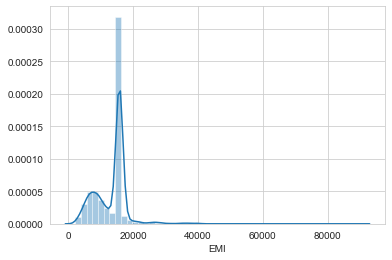

In [98]:
sns.distplot(df['EMI'])

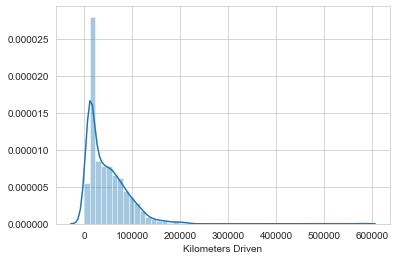

In [99]:
sns.distplot(df['Kilometers Driven'])

# Label Encoding

In [100]:
list=['Brand','Owner','Location','Fuel Type']
for i in list:
    print(df[i].unique())
    df[i]=LE.fit_transform(df[i])
    print(df[i].unique())

['Maruti' 'Hyundai' 'Datsun' 'Toyota' 'Renault' 'Honda' 'KIA' 'Tata'
 'Ford' 'Mahindra' 'Chevrolet' 'Volkswagen' 'Skoda' 'Nissan' 'MG' 'BMW'
 'Mercedes' 'Jeep' 'Audi' 'Fiat' 'Ssangyong' 'HYUNDAI']
[13  8  3 20 16  7 10 19  5 12  2 21 17 15 11  1 14  9  0  4 18  6]
['1st Owner' '2nd Owner' '3rd Owner' '4th Owner']
[0 1 2 3]
['DELHI' 'NOIDA' 'GURGAON' 'LUDHIANA']
[0 3 1 2]
['Petrol' 'Diesel' 'Petrol + CNG']
[1 0 2]


In [101]:
df


,EMI,Price,Kilometers Driven,Owner,Year of Purchase,Fuel Type,Location,Brand
0,4734,212799,20354,0,2011,1,0,13
1,12110,544399,6623,0,2020,1,0,13
2,17017,765000,12268,0,2022,1,0,13
3,6535,293799,8501,0,2017,1,0,13
4,3908,175699,42321,0,2012,1,0,13
...,...,...,...,...,...,...,...,...
2567,6306,294299,5636,1,2017,1,0,13
2568,5905,262699,15468,0,2022,1,0,3
2569,10652,492199,12268,0,2022,1,0,13
2570,9505,444799,13509,1,2014,1,0,13


# Multivariate Analysis

In [102]:
dfcorr=df.corr()
dfcorr

,Price,Kilometers Driven,Owner,Fuel Type,Location,Brand
Price,1.000000,-0.063209,0.006268,-0.033920,-0.001078,-0.393477
Kilometers Driven,-0.063209,1.000000,0.162718,-0.413302,0.155300,0.020285
Owner,0.006268,0.162718,1.000000,-0.048479,0.096456,-0.051485
Fuel Type,-0.033920,-0.413302,-0.048479,1.000000,-0.113266,-0.112325
Location,-0.001078,0.155300,0.096456,-0.113266,1.000000,0.040407
Brand,-0.393477,0.020285,-0.051485,-0.112325,0.040407,1.000000


In [103]:
df['EMI']=df['EMI'].astype('int32')

In [104]:
df['Year of Purchase']=df['Year of Purchase'].astype('int32')

In [105]:
df.dtypes

EMI                  int32
Price                int32
Kilometers Driven    int32
Owner                int32
Year of Purchase     int32
Fuel Type            int32
Location             int32
Brand                int32
dtype: object

In [106]:
df.describe()

,EMI,Price,Kilometers Driven,Owner,Year of Purchase,Fuel Type,Location,Brand
count,2572.000000,2.572000e+03,2572.000000,2572.000000,2572.000000,2572.000000,2572.000000,2572.000000
mean,13419.150078,6.035230e+05,47485.762442,0.171073,2018.668740,0.735614,0.454121,8.565708
std,5281.004336,2.370489e+05,41807.946508,0.431512,3.997654,0.495887,0.936238,3.745081
min,2224.000000,1.000000e+05,23.000000,0.000000,2007.000000,0.000000,0.000000,0.000000
25%,9438.000000,4.246740e+05,12268.000000,0.000000,2015.000000,0.000000,0.000000,6.000000
50%,15794.000000,7.100000e+05,36012.500000,0.000000,2022.000000,1.000000,0.000000,6.000000
75%,15794.000000,7.100000e+05,70394.750000,0.000000,2022.000000,1.000000,0.000000,13.000000
max,89868.000000,4.040000e+06,578889.000000,3.000000,2022.000000,2.000000,3.000000,21.000000


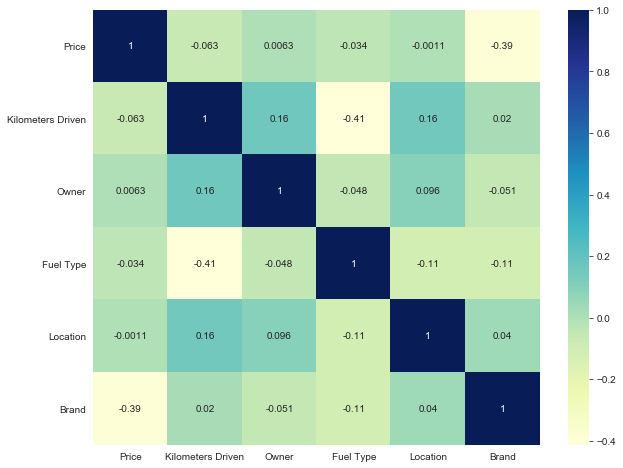

In [107]:
# Multivariate Analysis
plt.figure(figsize=(10,8))
sns.heatmap(dfcorr,cmap='YlGnBu',annot=True)

# Plotting Outliers

In [108]:
df.shape

(2572, 8)

EMI                     AxesSubplot(0.125,0.125;0.0824468x0.755)
Price                AxesSubplot(0.223936,0.125;0.0824468x0.755)
Kilometers Driven    AxesSubplot(0.322872,0.125;0.0824468x0.755)
Owner                AxesSubplot(0.421809,0.125;0.0824468x0.755)
Year of Purchase     AxesSubplot(0.520745,0.125;0.0824468x0.755)
Fuel Type            AxesSubplot(0.619681,0.125;0.0824468x0.755)
Location             AxesSubplot(0.718617,0.125;0.0824468x0.755)
Brand                AxesSubplot(0.817553,0.125;0.0824468x0.755)
dtype: object

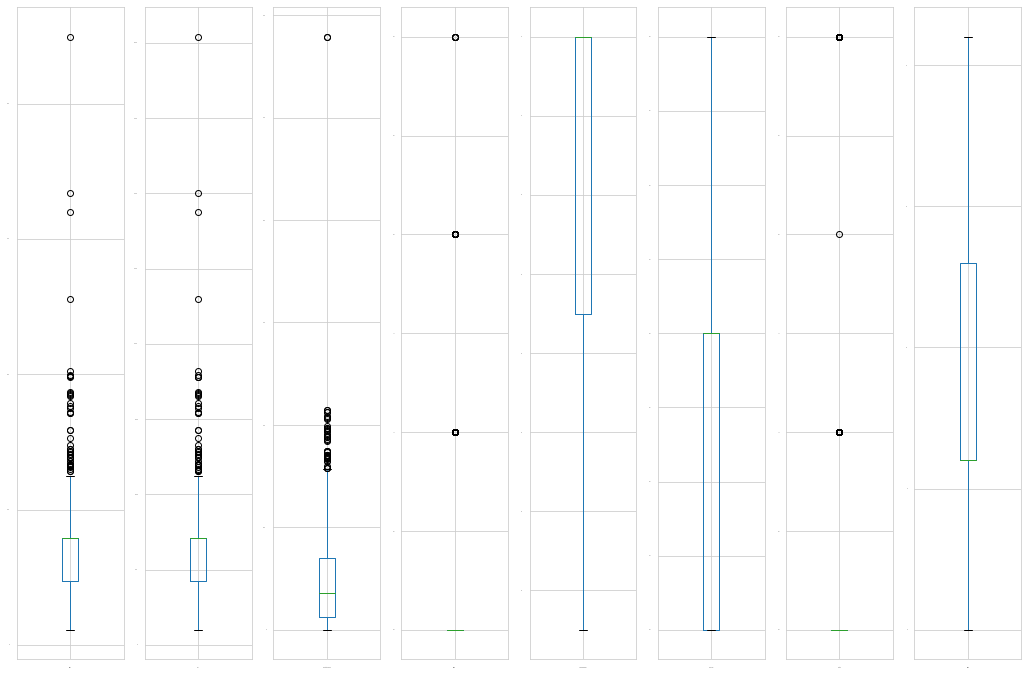

In [109]:
df.plot(kind='box',subplots=True,layout=(1,8),sharex=False,fontsize=1,figsize=(18,12))

In [110]:
df.columns

Index(['EMI', 'Price', 'Kilometers Driven', 'Owner', 'Year of Purchase',
       'Fuel Type', 'Location', 'Brand'],
      dtype='object')

# Removing Outliers

In [111]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [112]:
z

array([[1.64492177, 1.64860486, 0.64908805, ..., 0.53326133, 0.48514355,
        1.18426141],
       [0.24794614, 0.2494654 , 0.9775823 , ..., 0.53326133, 0.48514355,
        1.18426141],
       [0.68141386, 0.68132942, 0.84253387, ..., 0.53326133, 0.48514355,
        1.18426141],
       ...,
       [0.52408368, 0.46971594, 0.84253387, ..., 0.53326133, 0.48514355,
        1.18426141],
       [0.74131945, 0.66971356, 0.81284474, ..., 0.53326133, 0.48514355,
        1.18426141],
       [0.27042727, 0.20622537, 0.98148184, ..., 0.53326133, 0.48514355,
        1.98546798]])

In [113]:
threshold=3
print(np.where(z>3))

(array([  15,   67,   88,  150,  218,  237,  237,  268,  297,  312,  349,
        352,  362,  378,  408,  440,  477,  477,  489,  495,  513,  513,
        529,  529,  529,  533,  538,  538,  539,  550,  558,  558,  582,
        584,  585,  588,  597,  600,  617,  617,  617,  620,  622,  623,
        629,  629,  636,  636,  636,  643,  651,  671,  671,  671,  678,
        678,  678,  701,  706,  720,  720,  729,  729,  746,  746,  751,
        752,  752,  758,  771,  771,  771,  772,  772,  793,  812,  812,
        815,  820,  829,  841,  841,  846,  848,  857,  861,  866,  867,
        873,  873,  883,  897,  897,  898,  901,  915,  921,  927,  929,
        935,  952,  954,  954,  957,  960,  964,  968,  971,  971,  971,
        975,  976,  977,  981,  982,  984,  993,  993,  995,  995,  997,
        998,  998,  999, 1003, 1004, 1016, 1027, 1038, 1040, 1044, 1050,
       1053, 1082, 1083, 1090, 1098, 1105, 1107, 1243, 1281, 1285, 1311,
       1319, 1361, 1464, 1476, 1619, 1675, 1719, 1

In [114]:
df_new=df[(z<3).all(axis=1)]

In [115]:
df_new.shape

(2425, 8)

In [116]:
df.shape

(2572, 8)

In [117]:
((2572-2425)/2572)*100

5.715396578538103

In [118]:
df=df_new

# To check Skewness

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D5E176E2C8>,
      dtype=object)

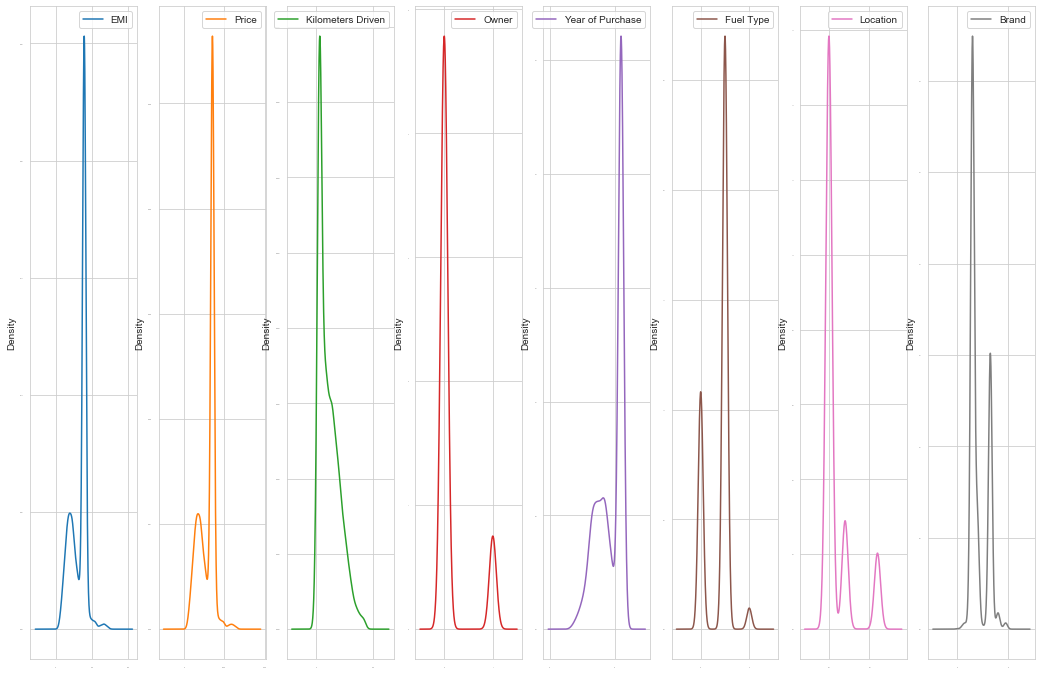

In [119]:
df.plot(kind='density',subplots=True,layout=(1,8),sharex=False,fontsize=1,figsize=(18,12))

In [120]:
df.skew()

EMI                 -0.494019
Price               -0.498961
Kilometers Driven    1.010348
Owner                2.129177
Year of Purchase    -0.802328
Fuel Type           -0.475472
Location             2.129358
Brand                0.900200
dtype: float64

In [121]:
df_rs=['Kilometers Driven','Owner','Location','Brand']
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [122]:
df.skew()

EMI                 -0.494019
Price               -0.498961
Kilometers Driven    0.405884
Owner                2.129177
Year of Purchase    -0.802328
Fuel Type           -0.475472
Location             1.556927
Brand                0.698134
dtype: float64

In [123]:
df_rs=['Owner','Location','Brand']
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [124]:
df.skew()

EMI                 -0.494019
Price               -0.498961
Kilometers Driven    0.405884
Owner                2.129177
Year of Purchase    -0.802328
Fuel Type           -0.475472
Location             1.321100
Brand                0.174003
dtype: float64

# Train Test Split

In [125]:
df.columns

Index(['EMI', 'Price', 'Kilometers Driven', 'Owner', 'Year of Purchase',
       'Fuel Type', 'Location', 'Brand'],
      dtype='object')

In [126]:
x=df[['EMI','Kilometers Driven', 'Owner', 'Year of Purchase',
       'Fuel Type', 'Location', 'Brand']]
y=df['Price']

# Scaling of Data

In [127]:
#scaling the input data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [128]:
x=pd.DataFrame(x)

In [129]:
x.columns=['EMI','Kilometers Driven', 'Owner', 'Year of Purchase',
       'Fuel Type', 'Location', 'Brand']

# Algorithms

In [130]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    r2score=r2_score(y_test,pred)
    print(r2_score(y_test,pred))
    print('error:')
    print('Mean absolute error:',mean_absolute_error(y_test,pred))
    print('Mean squared error:',mean_squared_error(y_test,pred))
    print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
    if r2score>maxAccu:
        maxAccu=r2score
        maxRS=i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

0.9996469593576028
error:
Mean absolute error: 1253.1421509429595
Mean squared error: 13048631.240194967
Root Mean squared error: 3612.2889198117814
0.9997746610543948
error:
Mean absolute error: 1026.6942653972244
Mean squared error: 8784719.004584093
Root Mean squared error: 2963.902664492222
0.9996398520553985
error:
Mean absolute error: 1238.5990283351996
Mean squared error: 14099018.825077666
Root Mean squared error: 3754.866019590801
0.9998011466827172
error:
Mean absolute error: 1127.5828641008118
Mean squared error: 7842335.423597711
Root Mean squared error: 2800.417008875234
0.9996130429925937
error:
Mean absolute error: 1262.8210639932481
Mean squared error: 14781881.085848497
Root Mean squared error: 3844.7211974145143
0.9995804189714039
error:
Mean absolute error: 1180.3976057534126
Mean squared error: 14244937.78398457
Root Mean squared error: 3774.246651185448
0.999663320216169
error:
Mean absolute error: 1058.5879187684168
Mean squared error: 12073496.894353723
Root Mean

In [131]:
#splitting the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=11)

In [132]:
#checking the shape of training and testing data
print(x_train.shape,x_test.shape)

(1891, 7) (534, 7)


In [133]:
print(y_train.shape,y_test.shape)

(1891,) (534,)


In [134]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor


In [135]:
# All algorithms using loop
model=[LinearRegression(), Lasso(),Ridge(), ElasticNet(), SVR(), DecisionTreeRegressor(), KNeighborsRegressor()
       ,RandomForestRegressor(),AdaBoostRegressor()]
for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    print('score of',m,'is:',score)
    print('Mean absolute error:',mean_absolute_error(y_test,pred))
    mean_squared_error_lm=mean_squared_error(y_test,pred)
    print('Mean squared error:',mean_squared_error_lm)
    print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
    r2score=r2_score(y_test,pred)
    print('r2_score:',r2_score(y_test,pred))
    print('**********************************')
    print('\n')
    

score of LinearRegression() is: 0.9996474512305902
Mean absolute error: 938.1405224492929
Mean squared error: 5223939.0286908
Root Mean squared error: 2285.5938022078203
r2_score: 0.9998684841721377
**********************************


score of Lasso() is: 0.9996474509430812
Mean absolute error: 938.3311622977559
Mean squared error: 5225181.8003501985
Root Mean squared error: 2285.8656566714935
r2_score: 0.9998684528846087
**********************************


score of Ridge() is: 0.999647018760119
Mean absolute error: 988.3007251449081
Mean squared error: 5357283.331562456
Root Mean squared error: 2314.5805951753887
r2_score: 0.9998651271485801
**********************************


score of ElasticNet() is: 0.8898039215810964
Mean absolute error: 50919.51219759205
Mean squared error: 4425749574.889732
Root Mean squared error: 66526.3073895563
r2_score: 0.888579074898045
**********************************


score of SVR() is: -0.38621729485742606
Mean absolute error: 137696.69377704128
M

Decision Tree Regressor is the best algoritm with 100% accuracy.

# Cross Validation Score

In [136]:
from sklearn.model_selection import cross_val_score
lrscores=cross_val_score(DecisionTreeRegressor(),x,y,cv=5)
print(lrscores)
print(lrscores.mean(),lrscores.std())

[0.9986206  0.99880938 0.99999934 0.99996769 0.99813251]
0.9991059037832872 0.0007499134725229028


As the difference between accuracy scores and cross validation scores of Decision Tree Regressor is only 9%. 
So, It is verified that Decision Tree Regressor is the best algorithm for this model with accuracy of 100 %.

No need to apply hyper parameter tuning as the model has already perfect accuracy.

# Saving the model

In [138]:
import joblib
joblib.dump(DecisionTreeRegressor(),"dtr_car_pricing.obj")

['dtr_car_pricing.obj']